<a href="https://colab.research.google.com/github/MartinAbdrakhmanov/greatarts/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_pyad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# парсим 😍

In [ ]:
# Это необходимо, чтобы запустить код в Google Colab. Источник: https://nariyoo.com/python-how-to-run-selenium-in-google-colab/
%%capture
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb
CHROME_DRIVER_VERSION=`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`
wget -N https://chromedriver.storage.googleapis.com/$CHROME_DRIVER_VERSION/chromedriver_linux64.zip -P /tmp/
unzip -o /tmp/chromedriver_linux64.zip -d /tmp/
chmod +x /tmp/chromedriver
mv /tmp/chromedriver /usr/local/bin/chromedriver
pip install selenium chromedriver-autoinstaller

In [ ]:
import sys
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import chromedriver_autoinstaller


sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--verbose')
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('--window-size=1920, 1200')
chrome_options.add_argument('--disable-dev-shm-usage')

chromedriver_autoinstaller.install()
  # создание объекта драйвера

'/usr/local/lib/python3.10/dist-packages/chromedriver_autoinstaller/131/chromedriver'

In [ ]:
# Список авторов и ссылки на их галереи
authors = {
    "Василий Иванович Суриков":"https://gallerix.ru/album/Surikov",
    "Валентин Александрович Серов":"https://gallerix.ru/album/Serov",
}

for author in authors:

  try:
      driver = webdriver.Chrome(options=chrome_options)
      # Переход на страницу автора
      url = authors[author]
      driver.get(url)

      # Ожидание загрузки всех необходимых элементов
      WebDriverWait(driver, 10).until(
          EC.presence_of_all_elements_located((By.CLASS_NAME, "pic"))
      )

      # Поиск всех div с классом 'pic' или 'pic lazi hide'
      divs = driver.find_elements(By.CLASS_NAME, "pic")
      divs += driver.find_elements(By.CLASS_NAME, "pic lazi hide")
      links = []
      for div in divs:
          a_tag = div.find_element(By.TAG_NAME, "a")  # Ищем тег <a> внутри <div>
          if a_tag:
              links.append(a_tag.get_attribute("href"))
      images = []
      for i, link in enumerate(links):
          driver.get(link)  # Переход на страницу конкретного произведения
          # Ожидание загрузки тега <p class='xpic'>
          WebDriverWait(driver, 10).until(
              EC.presence_of_element_located((By.CLASS_NAME, "xpic"))
          )

          # Получение ссылки на изображение
          img_src = driver.find_element(By.CLASS_NAME, "xpic").find_element(By.TAG_NAME, "img").get_attribute("src")
          images.append({
              'Автор':author,
              'Ссылка': img_src
              })
  finally:
      driver.quit()
  df = pd.DataFrame(images)
  print(df)
  df.to_csv(f"{author}.csv", index=False)

                        Автор  \
0    Василий Иванович Суриков   
1    Василий Иванович Суриков   
2    Василий Иванович Суриков   
3    Василий Иванович Суриков   
4    Василий Иванович Суриков   
..                        ...   
232  Василий Иванович Суриков   
233  Василий Иванович Суриков   
234  Василий Иванович Суриков   
235  Василий Иванович Суриков   
236  Василий Иванович Суриков   

                                                Ссылка  
0    https://sr.gallerix.ru/_EX/235093152/414840698...  
1    https://sr.gallerix.ru/_EX/235093152/438351440...  
2    https://sr.gallerix.ru/_EX/235093152/429782104...  
3    https://sr.gallerix.ru/_EX/235093152/314974975...  
4    https://sr.gallerix.ru/_EX/235093152/741244506...  
..                                                 ...  
232  https://sr.gallerix.ru/_EX/2037947957/92702331...  
233  https://sr.gallerix.ru/_EX/2037947957/48616943...  
234  https://sr.gallerix.ru/_EX/2037947957/96278381...  
235  https://sr.gallerix.ru/_EX/2

In [ ]:
df = pd.DataFrame(images)
print(df)
df.to_csv(f"{author}.csv", index=False)

               Автор                                             Ссылка
0    Винсент ван Гог  https://sr.gallerix.ru/_EX/280359500/413874770...
1    Винсент ван Гог  https://sr.gallerix.ru/_EX/280359500/109300006...
2    Винсент ван Гог      https://sr.gallerix.ru/_EX/280359500/5960.jpg
3    Винсент ван Гог  https://sr.gallerix.ru/_EX/280359500/610756532...
4    Винсент ван Гог  https://sr.gallerix.ru/_EX/280359500/374310609...
..               ...                                                ...
939  Винсент ван Гог  https://sr.gallerix.ru/_EX/280359500/185525624...
940  Винсент ван Гог  https://sr.gallerix.ru/_EX/280359500/992973804...
941  Винсент ван Гог  https://sr.gallerix.ru/_EX/280359500/172983397...
942  Винсент ван Гог  https://sr.gallerix.ru/_EX/280359500/207590307...
943  Винсент ван Гог  https://sr.gallerix.ru/_EX/280359500/109042009...

[944 rows x 2 columns]


# Загрузочка 😖

In [ ]:
pip install pillow

In [ ]:
import pandas as pd
import numpy as np
import requests
from PIL import Image
from io import BytesIO
from urllib.request import urlopen, Request
from PIL import Image

parallel version

In [ ]:
import asyncio
import aiohttp
import pandas as pd
import numpy as np
from PIL import Image
from io import BytesIO

# Асинхронная функция для загрузки изображений
async def download_image(url, session, semaphore):
    try:
        # Запрашиваем разрешение на выполнение задачи
        async with semaphore:
            headers = {'User-Agent': 'Mozilla/5.0'}
            async with session.get(url, headers=headers) as response:
                image_data = await response.read()

            # Преобразуем данные в изображение
            image = Image.open(BytesIO(image_data))

            # Изменяем размер изображения
            img_resized = image.resize((224, 224))

            # Преобразуем изображение в numpy массив и нормализуем
            image_array = np.array(img_resized) / 255.0

            return np.array2string(image_array, separator=',', threshold=np.inf)

    except Exception as e:
        print(f"Ошибка при обработке {url}: {e}")
        return None

# Асинхронная функция для обработки CSV файлов
async def process_csv(input_csv, output_csv, semaphore):
    df = pd.read_csv(input_csv)

    # Используем aiohttp для асинхронных HTTP запросов
    async with aiohttp.ClientSession() as session:
        # Асинхронно загружаем все изображения
        df['Картинка'] = await asyncio.gather(*[download_image(url, session, semaphore) for url in df['Ссылка']])

    # Сохраняем обновленный DataFrame в новый CSV
    df.to_csv(output_csv, index=False, encoding='utf-8')
    print(f"Обработанный CSV сохранен как {output_csv}")

# Список всех ваших файлов для обработки
input_files = [
    "Леонардо да Винчи.csv",
    "Айвазовский.csv",
    "Валентин Александрович Серов.csv",
    "Эдвард Мунк.csv",
    "Винсент ван Гог.csv",
    "Клод Моне.csv",
    "Рембрандт ван Рейн.csv",
    "Микеланджело Буонарроти.csv",
    "Василий Иванович Суриков.csv",
    "Рафаэль Санти.csv"
]

output_files = [
    "Леонардо да Винчи(img2).csv",
    "Айвазовский(img2).csv",
    "Валентин Александрович Серов(img2).csv",
    "Эдвард Мунк(img2).csv",
    "Винсент ван Гог(img2).csv",
    "Клод Моне(img2).csv",
    "Рембрандт ван Рейн(img2).csv",
    "Микеланджело Буонарроти(img2).csv",
    "Василий Иванович Суриков(img2).csv",
    "Рафаэль Санти(img2).csv"
]

# Количество одновременно выполняемых задач
CONCURRENT_REQUESTS = 5  # Измените это число в зависимости от того, сколько запросов хотите выполнять одновременно

# Асинхронная обработка нескольких файлов с ограничением на количество параллельных задач
async def main():
    # Семафор для ограничения параллельных запросов
    semaphore = asyncio.Semaphore(CONCURRENT_REQUESTS)

    tasks = [process_csv(input_csv, output_csv, semaphore) for input_csv, output_csv in zip(input_files, output_files)]
    await asyncio.gather(*tasks)

# Запуск асинхронной обработки
if __name__ == "__main__":
    asyncio.run(main())


# обработочка 🥶

In [ ]:
!pip install gdown
!gdown --id 1hmVfCX713yf5uAXit5onP3C7YGMXUFj0
!gdown --id 1-naqvgpyNSTjraZ7NqL4wq3-xWv-1vl9
!gdown --id 1CpRDoPN5QEagsuCrUS18cvF11-V7F0F6
!gdown --id 1rVKQvFe1hI4cuRYmecu8wBJtA3D8dUrz
!gdown --id 1l5ibet8w5tFGvu7QrDqtlLHIDojvwtQI
!gdown --id 1yMPIT6bHT1JnLC0kL6LVj9sqeoXK8riA
!gdown --id 1SbJS77WZsYNrff9FV9bGbL6KZNwVcHg7
!gdown --id 12LexnYvySdWHDnR3mhRhF1amYtQ4VjNt
!gdown --id 1_skSiudUxBhbJw3QaztvJp_KHp2DkkqB
!gdown --id 1bEJubj_bgrT-3x0q2MEyz6JMbeCHpwDP

/home/luckyapin/anaconda3/lib/python3.12/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1hmVfCX713yf5uAXit5onP3C7YGMXUFj0
From (redirected): https://drive.google.com/uc?id=1hmVfCX713yf5uAXit5onP3C7YGMXUFj0&confirm=t&uuid=e9b626f1-c3f2-4be8-b408-803d7168fd77
To: /home/luckyapin/Downloads/Леонардо да Винчи(img2).csv
100%|████████████████████████████████████████| 116M/116M [00:05<00:00, 20.7MB/s]
/home/luckyapin/anaconda3/lib/python3.12/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1-naqvgpyNSTjraZ7NqL4wq3-xWv-1vl9
From (redirected): https://drive.google.com/uc?id=1-naqvgpy

In [ ]:
import pandas as pd
import numpy as np
def string_to_np_array(s):
    return np.array(eval(s))
output_files = [
    "Леонардо да Винчи(img2).csv",
    "Айвазовский(img2).csv",
    "Валентин Александрович Серов(img2).csv",
    "Эдвард Мунк(img2).csv",
    "Винсент ван Гог(img2).csv",
    "Клод Моне(img2).csv",
    "Рембрандт ван Рейн(img2).csv",
    "Микеланджело Буонарроти(img2).csv",
    "Василий Иванович Суриков(img2).csv",
    "Рафаэль Санти(img2).csv"
]
data = []
for f in output_files:
    data.append(pd.read_csv(f))
    print(f)

df = pd.concat(data, ignore_index=True)[['Автор', 'Картинка']]
df['Картинка'] = df['Картинка'].apply(string_to_np_array)


Леонардо да Винчи(img2).csv
Айвазовский(img2).csv
Валентин Александрович Серов(img2).csv
Эдвард Мунк(img2).csv
Винсент ван Гог(img2).csv
Клод Моне(img2).csv
Рембрандт ван Рейн(img2).csv
Микеланджело Буонарроти(img2).csv
Василий Иванович Суриков(img2).csv
Рафаэль Санти(img2).csv


In [ ]:
output_files = [
    "Валентин Александрович Серов(img2).csv",
    "Эдвард Мунк(img2).csv",
    "Винсент ван Гог(img2).csv",
    "Клод Моне(img2).csv",
    "Рембрандт ван Рейн(img2).csv",
    "Микеланджело Буонарроти(img2).csv",
    "Василий Иванович Суриков(img2).csv",
    "Рафаэль Санти(img2).csv"
]

In [ ]:
import pandas as pd
import numpy as np
import pickle
def string_to_np_array(s):
    return np.array(eval(s))

for f in output_files:
    df_simple = pd.read_csv(f)
    df_simple['Картинка'] = df_simple['Картинка'].apply(string_to_np_array)
    # Сохранение переменной в файл
    with open(f'{f.split('.')[0]}.pkl', 'wb') as f:
        pickle.dump(df_simple, f)
    print(f)

<_io.BufferedWriter name='Валентин Александрович Серов(img2).pkl'>
<_io.BufferedWriter name='Эдвард Мунк(img2).pkl'>
<_io.BufferedWriter name='Винсент ван Гог(img2).pkl'>
<_io.BufferedWriter name='Клод Моне(img2).pkl'>
<_io.BufferedWriter name='Рембрандт ван Рейн(img2).pkl'>
<_io.BufferedWriter name='Микеланджело Буонарроти(img2).pkl'>
<_io.BufferedWriter name='Василий Иванович Суриков(img2).pkl'>
<_io.BufferedWriter name='Рафаэль Санти(img2).pkl'>


In [ ]:
full_output_files = [
    "Леонардо да Винчи(img2).csv",
    "Айвазовский(img2).csv",
    "Валентин Александрович Серов(img2).csv",
    "Эдвард Мунк(img2).csv",
    "Винсент ван Гог(img2).csv",
    "Клод Моне(img2).csv",
    "Рембрандт ван Рейн(img2).csv",
    "Микеланджело Буонарроти(img2).csv",
    "Василий Иванович Суриков(img2).csv",
    "Рафаэль Санти(img2).csv"
]
full_output_files = [
    "Леонардо да Винчи(img2).csv",
    "Валентин Александрович Серов(img2).csv",
    "Эдвард Мунк(img2).csv",
    "Рембрандт ван Рейн(img2).csv",
    "Микеланджело Буонарроти(img2).csv",
    "Василий Иванович Суриков(img2).csv",
    "Рафаэль Санти(img2).csv"
]
data = []
import pickle
for fi in full_output_files:
    base_name = fi.split('.')[0]
    print(f'{base_name}.pkl')
    with open(f'{base_name}.pkl', 'rb') as f:
        df_simple = pickle.load(f)
    data.append(df_simple)


Леонардо да Винчи(img2).pkl
Валентин Александрович Серов(img2).pkl
Эдвард Мунк(img2).pkl
Рембрандт ван Рейн(img2).pkl
Микеланджело Буонарроти(img2).pkl
Василий Иванович Суриков(img2).pkl
Рафаэль Санти(img2).pkl


In [ ]:
import pandas as pd
df = pd.concat(data, ignore_index=True)[['Автор', 'Картинка']]
df

,Автор,Картинка
0,Леонардо да Винчи,"[[[0.47843137, 0.33333333, 0.27058824], [0.447..."
1,Леонардо да Винчи,"[[[0.47058824, 0.40392157, 0.32941176], [0.482..."
2,Леонардо да Винчи,"[[[0.45490196, 0.39215686, 0.21960784], [0.474..."
3,Леонардо да Винчи,"[[[0.16470588, 0.16078431, 0.14509804], [0.125..."
4,Леонардо да Винчи,"[[[0.84313725, 0.71372549, 0.6], [0.69411765, ..."
...,...,...
1413,Рафаэль Санти,"[[[0.41176471, 0.44313725, 0.38039216], [0.647..."
1414,Рафаэль Санти,"[[[0.3254902, 0.26666667, 0.19215686], [0.5725..."
1415,Рафаэль Санти,"[[[0.6627451, 0.70980392, 0.83921569], [0.6862..."
1416,Рафаэль Санти,"[[[0.5372549, 0.42745098, 0.25490196], [0.5411..."


In [ ]:
import numpy as np
def ensure_rgb(img):
    if len(img.shape) == 2:  # Если изображение 2D (224, 224)

        return np.stack([img] * 3, axis=-1)  # Дублируем каналы для создания RGB (224, 224, 3)
    return img  # Если уже RGB, ничего не меняем

df['Картинка'] = df['Картинка'].apply(ensure_rgb)

shapes = [np.array(img).shape for img in df['Картинка']]
print(set(shapes))

{(224, 224, 3)}


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['author'] = label_encoder.fit_transform(df['Автор'])


In [ ]:
with open(f'df.pkl', 'wb') as f:
        pickle.dump(df, f)

In [ ]:
import pickle
with open(f'df.pkl', 'rb') as f:
        df = pickle.load(f)

In [ ]:
from sklearn.model_selection import train_test_split

test_size=0.15
val_size=0.15
random_state=52

# Сначала группируем данные по авторам
grouped = df.groupby('author')

print(grouped.size())



author
0    195
1    237
2     61
3     97
4    242
5    367
6    219
dtype: int64


In [ ]:
import pandas as pd
train_list, val_list, test_list = [], [], []

for author, group in grouped:
    # Разделяем для каждого автора его данные на три части
    train_val, test = train_test_split(group, test_size=test_size, random_state=random_state)
    train, val = train_test_split(train_val, test_size=val_size / (1 - test_size), random_state=random_state)  # Корректируем размер валидационной выборки

    # Добавляем данные в соответствующие списки
    train_list.append(train)
    val_list.append(val)
    test_list.append(test)

# Объединяем все разделенные данные в окончательные наборы
train_df = pd.concat(train_list)
val_df = pd.concat(val_list)
test_df = pd.concat(test_list)

train_df = train_df.sample(frac=1).reset_index(drop=True)
val_df = val_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)

In [ ]:
print(train_df)
print(f"Размер обучающего набора: {len(train_df)}")
print(f"Размер валидационного набора: {len(val_df)}")
print(f"Размер тестового набора: {len(test_df)}")

                            Автор  \
0                     Эдвард Мунк   
1              Рембрандт ван Рейн   
2    Валентин Александрович Серов   
3                     Эдвард Мунк   
4                   Рафаэль Санти   
..                            ...   
981  Валентин Александрович Серов   
982  Валентин Александрович Серов   
983            Рембрандт ван Рейн   
984                   Эдвард Мунк   
985             Леонардо да Винчи   

                                              Картинка  author  
0    [[[0.98039216, 0.98039216, 0.94509804], [0.992...       6  
1    [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...       5  
2    [[[0.68235294, 0.61176471, 0.4745098], [0.6588...       0  
3    [[[0.24705882, 0.18823529, 0.18823529], [0.223...       6  
4    [[[0.15294118, 0.19215686, 0.16078431], [0.239...       4  
..                                                 ...     ...  
981  [[[0.61960784, 0.61960784, 0.61960784], [0.772...       0  
982  [[[0.7372549, 0.76078431, 0.51

In [ ]:
import pickle
with open(f'train_df.pkl', 'wb') as f:
        pickle.dump(train_df, f)
with open(f'val_df.pkl', 'wb') as f:
        pickle.dump(val_df, f)
with open(f'test_df.pkl', 'wb') as f:
        pickle.dump(test_df, f)

# обучение 🤓

In [ ]:
import pickle
with open(f'train_df.pkl', 'rb') as f:
        train_df = pickle.load(f)
with open(f'val_df.pkl', 'rb') as f:
        val_df = pickle.load(f)
with open(f'test_df.pkl', 'rb') as f:
        test_df = pickle.load(f)

In [ ]:
import numpy as np
import gc
# Преобразование изображений в numpy-массивы (если они ещё не в этом формате)
train_images = np.array(train_df['Картинка'].tolist())
train_labels = np.array(train_df['author'].tolist())
del train_df
val_images = np.array(val_df['Картинка'].tolist())
val_labels = np.array(val_df['author'].tolist())
del val_df
gc.collect()
# Проверим размеры
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Val images shape: {val_images.shape}")
print(f"Val labels shape: {val_labels.shape}")


Train images shape: (986, 224, 224, 3)
Train labels shape: (986,)
Val images shape: (215, 224, 224, 3)
Val labels shape: (215,)


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2024-12-21 20:06:29.090159: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-21 20:06:29.218585: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734800789.277731   12601 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734800789.295314   12601 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-21 20:06:29.419197: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Num GPUs Available:  0


2024-12-21 20:06:42.436304: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization


from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers
import tensorflow as tf

# 1. Загрузка предобученной модели ResNet50 без верхнего слоя классификации
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


# 2. Замораживаем веса предварительно обученной модели, чтобы не обновлять их во время обучения
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# 3. Добавляем новый классификатор
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Применяем глобальный пуллинг для уменьшения размерности
x = BatchNormalization()(x)
x = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)  # Полносвязный слой с 1024 нейронами
x = Dropout(0.5)(x)  # Dropout для предотвращения переобучения
predictions = Dense(len(np.unique(train_labels)), activation='softmax')(x) # Финальный слой для классификации

# 4. Собираем полную модель
model = Model(inputs=base_model.input, outputs=predictions)

# 5. Компилируем модель
optimizer = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 6. Просматриваем архитектуру модели
#model.summary()

214
214
986
986


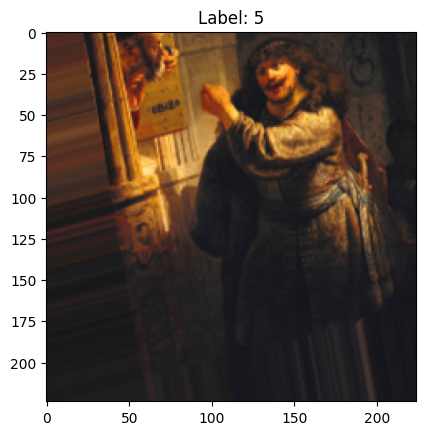

In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

if len(val_images)%2:
    val_images = val_images[:-1]
    val_labels = val_labels[:-1]

if len(train_images)%2:
    train_images = train_images[:-1]
    train_labels = train_labels[:-1]
print(len(val_images))
print(len(val_labels))
print(len(train_images))
print(len(train_labels))

# Создаем генератор с аугментацией для тренировочных данных
datagen = ImageDataGenerator(
    rotation_range=20,  # Увеличение диапазона поворота
    width_shift_range=0.2,  # Увеличение диапазона сдвига по ширине
    height_shift_range=0.2,  # Увеличение диапазона сдвига по высоте
    shear_range=0.2,  # Добавление сдвига (shear), искажающего изображение
    zoom_range=0.2,  # Добавление случайного масштабирования
    horizontal_flip=True,  # Горизонтальное отражение
    vertical_flip=True,  # Вертикальное отражение
    fill_mode='nearest',  # Как заполнять пиксели, которые появляются после трансформаций
    channel_shift_range=0.05  # Сдвиг цветового канала
)

batch_size = 2
# Генерация тренировочного набора
train_gen = datagen.flow(train_images, train_labels, batch_size=batch_size)

# Создаем Dataset из генератора
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_gen,
    output_signature=(
        tf.TensorSpec(shape=(batch_size, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(batch_size,), dtype=tf.float32)
    )
)

# Создаем Dataset для валидации без аугментации
val_datagen = ImageDataGenerator()
val_gen = val_datagen.flow(val_images, val_labels, batch_size=batch_size)

val_dataset = tf.data.Dataset.from_generator(
    lambda: val_gen,
    output_signature=(
        tf.TensorSpec(shape=(batch_size, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(batch_size,), dtype=tf.float32)
    )
)

# Повторять данные, если они заканчиваются

train_dataset = train_dataset.repeat()
val_dataset = val_dataset.repeat()


# Отображение аугментированного изображения для проверки
for batch_images, batch_labels in train_gen:
    plt.imshow(batch_images[0])  # Отображение первого изображения в партии
    plt.title(f"Label: {batch_labels[0]}")
    plt.show()
    break



In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Получаем уникальные метки классов
class_labels = np.unique(train_labels)

# Вычисляем веса классов
class_weights = compute_class_weight(
    class_weight='balanced',  # Используем сбалансированные веса
    classes=class_labels,
    y=train_labels
)

# Преобразуем их в словарь для передачи в fit()
class_weight_dict = dict(zip(class_labels, class_weights))

print(class_weight_dict)

{np.int64(0): np.float64(1.0433862433862433), np.int64(1): np.float64(0.8536796536796537), np.int64(2): np.float64(3.3537414965986394), np.int64(3): np.float64(2.1023454157782515), np.int64(4): np.float64(0.8384353741496599), np.int64(5): np.float64(0.5502232142857143), np.int64(6): np.float64(0.9206349206349206)}


In [ ]:
# Обучаем модель на тренировочных данных
# Указываем количество шагов на эпоху
from tensorflow.keras.backend import clear_session
clear_session()

steps_per_epoch = len(train_images) // batch_size
validation_steps = len(val_images) // batch_size
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
# Коллбек для уменьшения скорости обучения
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.1, verbose=1)

# Коллбек для ранней остановки
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
with tf.device('/GPU:0'):
    # Обучаем модель
    history = model.fit(
        train_dataset,
        steps_per_epoch=steps_per_epoch,
        validation_data=val_dataset,
        validation_steps=validation_steps,
        epochs=50,
        class_weight=class_weight_dict
    )

test_images = np.array(test_df['Картинка'].tolist())
test_labels = np.array(test_df['author'].tolist())
test_generator = ImageDataGenerator().flow(test_images, test_labels, batch_size=batch_size)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

In [ ]:
import numpy as np
from PIL import Image
# Получаем первый батч данных с помощью итератора
iterator = iter(train_dataset)
images, labels = next(iterator)

# Теперь можно работать с изображениями и метками
first_image = images[0]
first_label = labels[0]

# Печатаем или визуализируем


# Ваш массив NumPy
array = np.array(first_image) * 255
print(array)
# Преобразование массива в изображение
image = Image.fromarray(array.astype(np.uint8))

# Отображение изображения
image.show()

# Сохранение изображения (если нужно)
image.save('output_image.png')



In [ ]:
# Сохранение модели в формате TensorFlow SavedModel
model.save('model.keras')


In [ ]:
model = tf.keras.models.load_model('model.keras')


# MobileNetV2

In [ ]:
import pickle
with open(f'train_df.pkl', 'rb') as f:
        train_df = pickle.load(f)
with open(f'val_df.pkl', 'rb') as f:
        val_df = pickle.load(f)
with open(f'test_df.pkl', 'rb') as f:
        test_df = pickle.load(f)

In [ ]:
import numpy as np
import gc
# Преобразование изображений в numpy-массивы (если они ещё не в этом формате)
train_images = np.array(train_df['Картинка'].tolist())
train_labels = np.array(train_df['author'].tolist())
del train_df
val_images = np.array(val_df['Картинка'].tolist())
val_labels = np.array(val_df['author'].tolist())
del val_df
gc.collect()
# Проверим размеры
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Val images shape: {val_images.shape}")
print(f"Val labels shape: {val_labels.shape}")


Train images shape: (986, 224, 224, 3)
Train labels shape: (986,)
Val images shape: (215, 224, 224, 3)
Val labels shape: (215,)


2024-12-21 21:39:06.746529: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-21 21:39:06.762086: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734806346.779720   60560 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734806346.784362   60560 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-21 21:39:06.799977: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

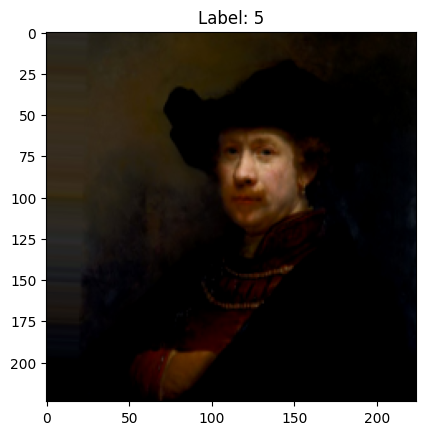

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



# Создаем генератор с аугментацией для тренировочных данных
datagen = ImageDataGenerator(
    rotation_range=20,  # Увеличение диапазона поворота
    width_shift_range=0.2,  # Увеличение диапазона сдвига по ширине
    height_shift_range=0.2,  # Увеличение диапазона сдвига по высоте
    shear_range=0.2,  # Добавление сдвига (shear), искажающего изображение
    zoom_range=0.2,  # Добавление случайного масштабирования
    horizontal_flip=True,  # Горизонтальное отражение
    vertical_flip=True,  # Вертикальное отражение
    fill_mode='nearest',  # Как заполнять пиксели, которые появляются после трансформаций
    channel_shift_range=0.05  # Сдвиг цветового канала
)

batch_size = 16

train_images = train_images[:-(len(train_images) % batch_size)]
train_labels = train_labels[:-(len(train_labels) % batch_size)]

val_images = val_images[:-(len(val_images) % batch_size)]
val_labels = val_labels[:-(len(val_labels) % batch_size)]

# Генерация тренировочного набора
train_gen = datagen.flow(train_images, train_labels, batch_size=batch_size)

# Создаем Dataset из генератора
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_gen,
    output_signature=(
        tf.TensorSpec(shape=(batch_size, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(batch_size,), dtype=tf.float32)
    )
)

# Создаем Dataset для валидации без аугментации
val_datagen = ImageDataGenerator()
val_gen = val_datagen.flow(val_images, val_labels, batch_size=batch_size)

val_dataset = tf.data.Dataset.from_generator(
    lambda: val_gen,
    output_signature=(
        tf.TensorSpec(shape=(batch_size, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(batch_size,), dtype=tf.float32)
    )
)

# Повторять данные, если они заканчиваются

train_dataset = train_dataset.repeat()
val_dataset = val_dataset.repeat()


# Отображение аугментированного изображения для проверки
for batch_images, batch_labels in train_gen:
    plt.imshow(batch_images[0])  # Отображение первого изображения в партии
    plt.title(f"Label: {batch_labels[0]}")
    plt.show()
    break



In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Получаем уникальные метки классов
class_labels = np.unique(train_labels)

# Вычисляем веса классов
class_weights = compute_class_weight(
    class_weight='balanced',  # Используем сбалансированные веса
    classes=class_labels,
    y=train_labels
)

# Преобразуем их в словарь для передачи в fit()
class_weight_dict = dict(zip(class_labels, class_weights))

print(class_weight_dict)

{np.int64(0): np.float64(1.0483351235230935), np.int64(1): np.float64(0.845021645021645), np.int64(2): np.float64(3.4006968641114983), np.int64(3): np.float64(2.0810234541577826), np.int64(4): np.float64(0.8399311531841652), np.int64(5): np.float64(0.5511010728402033), np.int64(6): np.float64(0.923368022705771)}


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, optimizers

# Создаем базовую модель MobileNetV2 с предобученными весами
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Замораживаем слои MobileNetV2, чтобы использовать их только для извлечения признаков

# Добавляем свои слои поверх предобученной модели
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Уменьшаем размерность признаков, полученных из MobileNetV2
    layers.Dense(256, activation='relu'),  # Полносвязный слой для обработки признаков
    layers.Dropout(0.5),  # Dropout для предотвращения переобучения
    layers.Dense(len(class_labels), activation='softmax')  # Финальный слой с softmax для классификации
])


# Компиляция модели
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),  # Оптимизатор Adam с начальным learning rate
    loss='sparse_categorical_crossentropy',  # Функция потерь для задачи многоклассовой классификации
    metrics=['accuracy']  # Метрика точности для отслеживания
)

# Вывод структуры модели
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,587,719 (9.87 MB)

 Trainable params: 329,735 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# Сохранение лучшей модели
checkpoint = ModelCheckpoint(
    'best_model.keras',  # Имя файла для сохранения
    monitor='val_loss',  # Метрика для отслеживания
    save_best_only=True,  # Сохранять только лучшую модель
    mode='min'  # Ориентируемся на минимизацию потерь
)

# Плавное уменьшение learning rate при отсутствии улучшений
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Метрика для отслеживания
    factor=0.5,  # Во сколько раз уменьшить learning rate
    patience=5,  # Количество эпох без улучшений
    min_lr=1e-6  # Минимальное значение learning rate
)

# Раннее остановка обучения при отсутствии улучшений
early_stopping = EarlyStopping(
    monitor='val_loss',  # Метрика для отслеживания
    patience=10,  # Количество эпох без улучшений
    restore_best_weights=True  # Восстановить веса лучшей модели
)


# Список callback-функций
callbacks = [checkpoint, reduce_lr, early_stopping]


In [ ]:
for images, labels in train_gen:
    print(images.shape)  # Ожидается (batch_size, 224, 224, 3)
    print(labels.shape)  # Ожидается (batch_size,)
    break


(16, 224, 224, 3)
(16,)


In [ ]:
# Количество шагов на эпоху
steps_per_epoch = len(train_images) // batch_size
validation_steps = len(val_images) // batch_size

# Тренировка модели
history = model.fit(
    train_dataset,
    epochs=50,  # Максимальное количество эпох
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    class_weight=class_weight_dict,  # Учет дисбаланса классов
    callbacks=callbacks  # Подключаем callback'и
)


Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 312ms/step - accuracy: 0.2832 - loss: 2.1083 - val_accuracy: 0.5962 - val_loss: 1.1484 - learning_rate: 0.0010
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 16s 257ms/step - accuracy: 0.5081 - loss: 1.2733 - val_accuracy: 0.6250 - val_loss: 0.9986 - learning_rate: 0.0010
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 16s 260ms/step - accuracy: 0.5777 - loss: 1.2901 - val_accuracy: 0.7404 - val_loss: 0.8952 - learning_rate: 0.0010
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 16s 264ms/step - accuracy: 0.6423 - loss: 0.9923 - val_accuracy: 0.7067 - val_loss: 0.8172 - learning_rate: 0.0010
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 16s 263ms/step - accuracy: 0.6479 - loss: 1.0624 - val_accuracy: 0.6971 - val_loss: 0.8059 - learning_rate: 0.0010
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 16s 261ms/step - accuracy: 0.6577 - loss: 1.0004 - val_accuracy: 0.7356 - val_loss: 0.7586 - learning_rate: 0.0010
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 16s 257ms/step - accuracy: 0.6971 - loss: 0.

In [ ]:
# Подготовка тестового датасета
test_datagen = ImageDataGenerator()
test_gen = test_datagen.flow(
    np.array(test_df['Картинка'].tolist()),
    np.array(test_df['author'].tolist()),
    batch_size=batch_size
)

test_dataset = tf.data.Dataset.from_generator(
    lambda: test_gen,
    output_signature=(
        tf.TensorSpec(shape=(batch_size, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(batch_size,), dtype=tf.float32)
    )
).repeat()

# Оценка модели на тестовых данных с явным указанием количества шагов
steps_per_epoch = len(test_df) // batch_size  # Количество шагов на тестовых данных

test_loss, test_accuracy = model.evaluate(test_dataset.take(steps_per_epoch))  # Указываем количество шагов
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")



13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - accuracy: 0.8644 - loss: 0.4742
Test Loss: 0.5587069988250732
Test Accuracy: 0.807692289352417


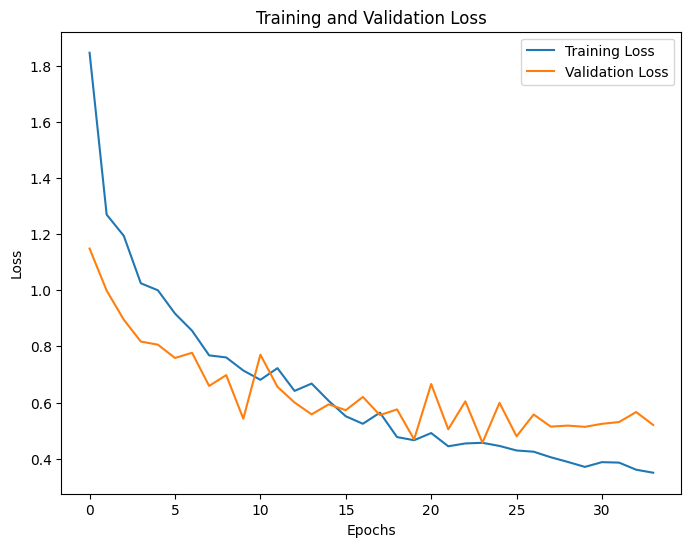

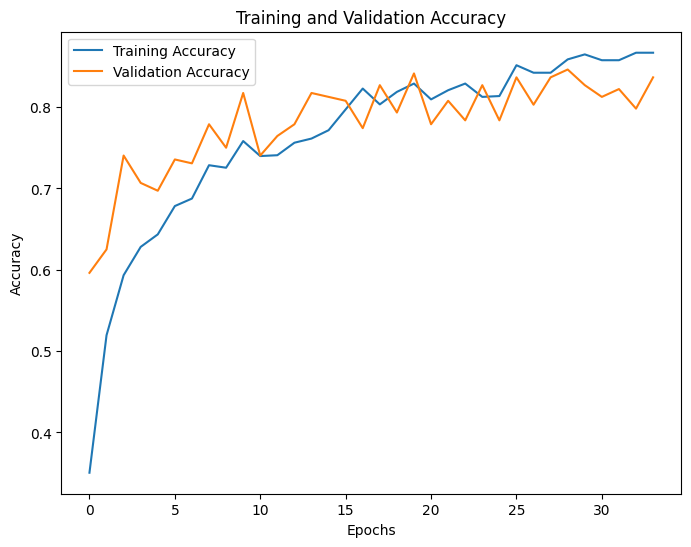

In [ ]:
import matplotlib.pyplot as plt

# График потерь
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# График точности
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


['Валентин Александрович Серов' 'Василий Иванович Суриков'
 'Леонардо да Винчи' 'Микеланджело Буонарроти' 'Рафаэль Санти'
 'Рембрандт ван Рейн' 'Эдвард Мунк']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


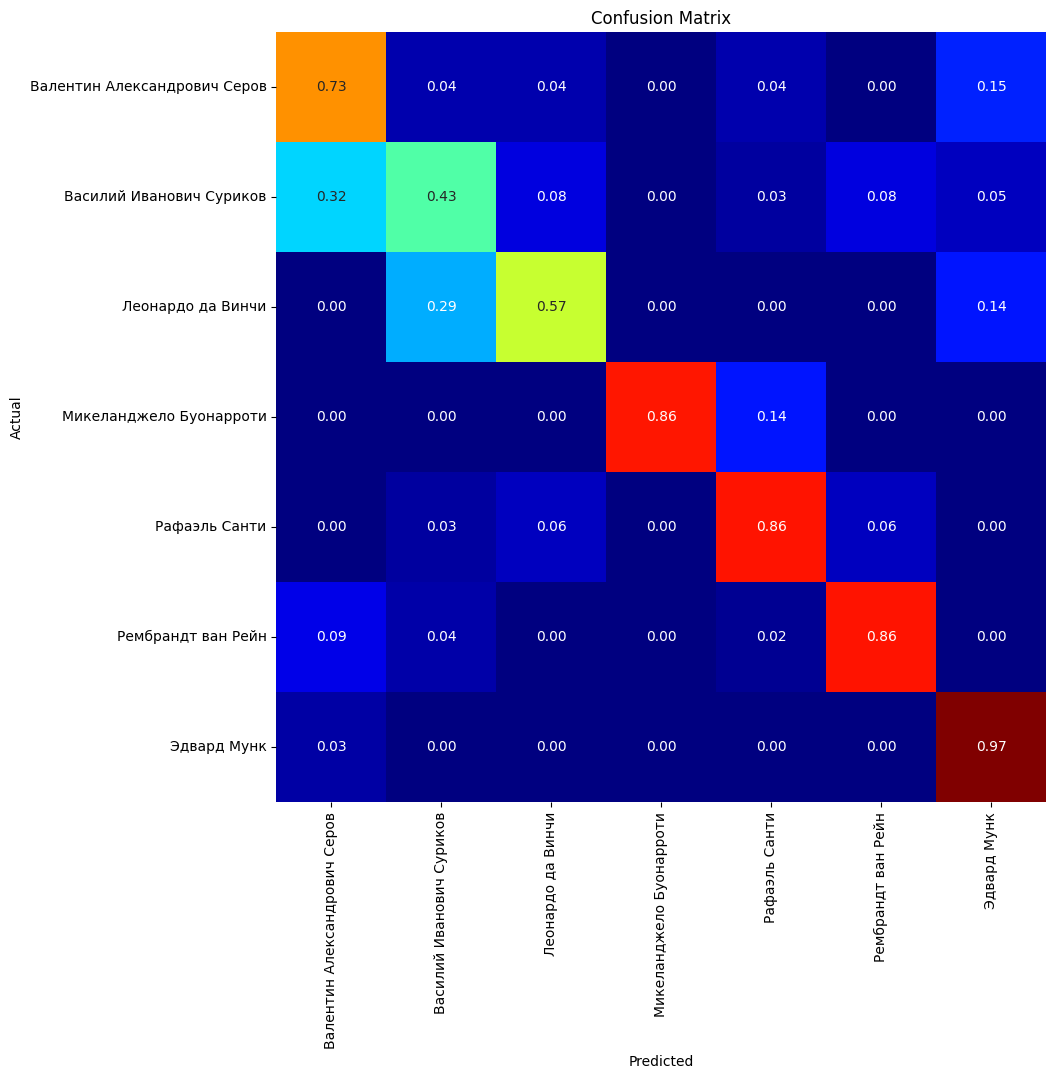

Classification Report:
                              precision    recall  f1-score   support

Валентин Александрович Серов       0.51      0.73      0.60        26
    Василий Иванович Суриков       0.73      0.43      0.54        37
           Леонардо да Винчи       0.40      0.57      0.47         7
     Микеланджело Буонарроти       1.00      0.86      0.92        14
               Рафаэль Санти       0.86      0.86      0.86        36
          Рембрандт ван Рейн       0.91      0.86      0.88        57
                 Эдвард Мунк       0.81      0.97      0.88        31

                    accuracy                           0.77       208
                   macro avg       0.75      0.75      0.74       208
                weighted avg       0.79      0.77      0.77       208



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

with open(f'train_df.pkl', 'rb') as f:
        train_df = pickle.load(f)

# Названия классов, предполагается, что они есть
print(np.unique(np.array(train_df['Автор'].tolist())))
tick_labels = np.unique(np.array(train_df['Автор'].tolist()))
tick_labels = [str(label) for label in tick_labels]

def show_classification_report(model, valid_generator, step_size_valid, n_classes):
    # Список для истинных и предсказанных меток
    y_pred, y_true = [], []

    # Перебор по всем данным из генератора
    for i in range(step_size_valid):
        (X, y) = next(valid_generator)
        y_pred_batch = model.predict(X)
        y_pred.append(np.argmax(y_pred_batch, axis=1))  # Предсказания по аргмакс для каждого изображения
        y_true.append(y)  # Истинные метки

    # Преобразование в плоские списки
    y_pred = np.concatenate(y_pred)
    y_true = np.concatenate(y_true)

    # Выводим confusion matrix
    fig, ax = plt.subplots(figsize=(10, 10))
    conf_matrix = confusion_matrix(y_true, y_pred, labels=np.arange(n_classes))
    conf_matrix = conf_matrix / np.sum(conf_matrix, axis=1, keepdims=True)
    sns.heatmap(conf_matrix, annot=True, fmt=".2f", square=True, cbar=False,
                cmap=plt.cm.jet, xticklabels=tick_labels, yticklabels=tick_labels, ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title('Confusion Matrix')
    plt.show()

    # Печать классификационного отчета
    print('Classification Report:')
    print(classification_report(y_true, y_pred, labels=np.arange(n_classes), target_names=tick_labels))

# STEP_SIZE_VALID — это количество батчей в валидационном наборе
STEP_SIZE_VALID = len(val_images) // batch_size

# Определите количество классов, например, на основе меток валидации
n_classes = len(np.unique(val_labels))

# Вызов функции
show_classification_report(model, val_gen, STEP_SIZE_VALID, n_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


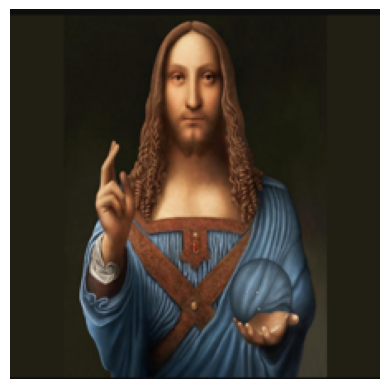

Predicted Class: Леонардо да Винчи


In [ ]:
import os
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# Загрузка сохраненной модели
best_model = load_model('best_model.keras')
import pickle
with open(f'train_df.pkl', 'rb') as f:
        train_df = pickle.load(f)
# Путь к изображению
image_path = 'spasitel-mira.jpg'

# Проверка, что файл существует
if os.path.exists(image_path):
    # Загрузка и подготовка изображения
    img = Image.open(image_path)
    img_resized = img.resize((224, 224))  # Изменение размера изображения под модель
    image_array = np.array(img_resized) / 255.0  # Нормализация изображения

    # Добавление размерности для батча
    sample_image = np.expand_dims(image_array, axis=0)

    # Предсказание
    prediction = best_model.predict(sample_image)
    predicted_class = np.argmax(prediction, axis=1)
    plt.imshow(img_resized)
    plt.axis('off')
    plt.show()

    print(f"Predicted Class: {np.unique(np.array(train_df['Автор'].tolist()))[predicted_class.item()]}")
else:
    print(f"File {image_path} does not exist.")
